### Visualize kymograph with force readout below it

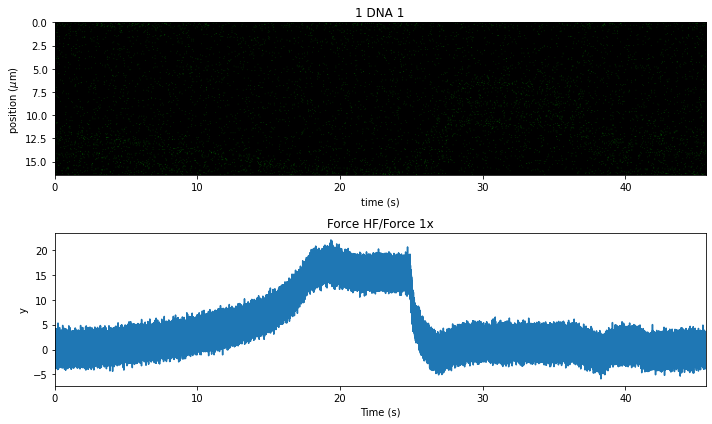

In [7]:
# Import required packages 
import matplotlib.pyplot as plt
import lumicks.pylake as lk
import numpy as np
import os

%matplotlib inline
raw_data_directory = r'C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\01 Data\Projects\SWR1 Project\lambda nucleosome array\700-1 Condition Data Used\2021-01-18\Before Adding SWR1 to channel 4\h5' + '/'

file_name = '20210118-173031 Kymograph 1 DNA 1'
file = lk.File(raw_data_directory + file_name + '.h5')
_, kymo = file.kymos.popitem()

plt.close('all')
plt.figure(figsize=(10, 6))

# Plot the kymograph
ax1 = plt.subplot(2, 1, 1)

# We use aspect="auto" because otherwise the kymo would be very long and thin
kymo.plot_green(vmax=4, aspect="auto")

# Plot the force
ax2 = plt.subplot(2, 1, 2, sharex = ax1)
plt.xlim(ax1.get_xlim())
file["Force HF"]["Force 1x"].plot()

plt.tight_layout()

plt.show()

### Visualize Individual Kymographs without Force

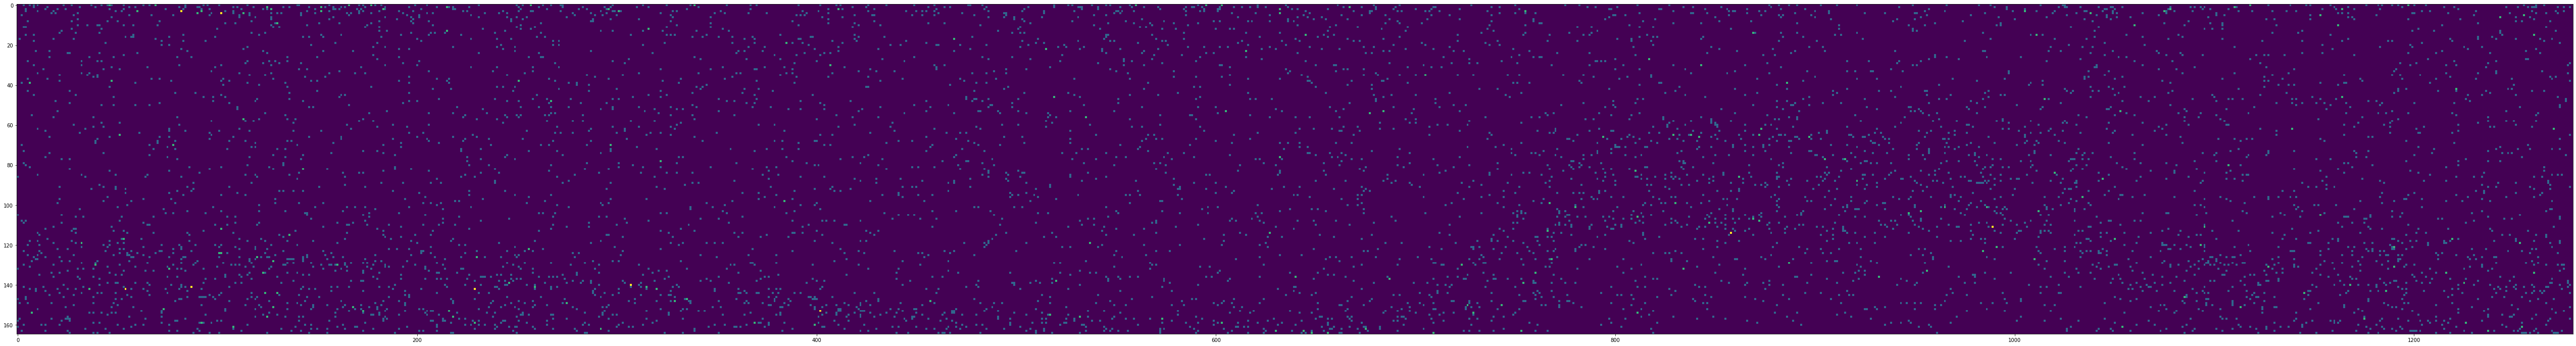

In [8]:
plt.figure(figsize=(120, 12))
plt.imshow(kymo.green_image)

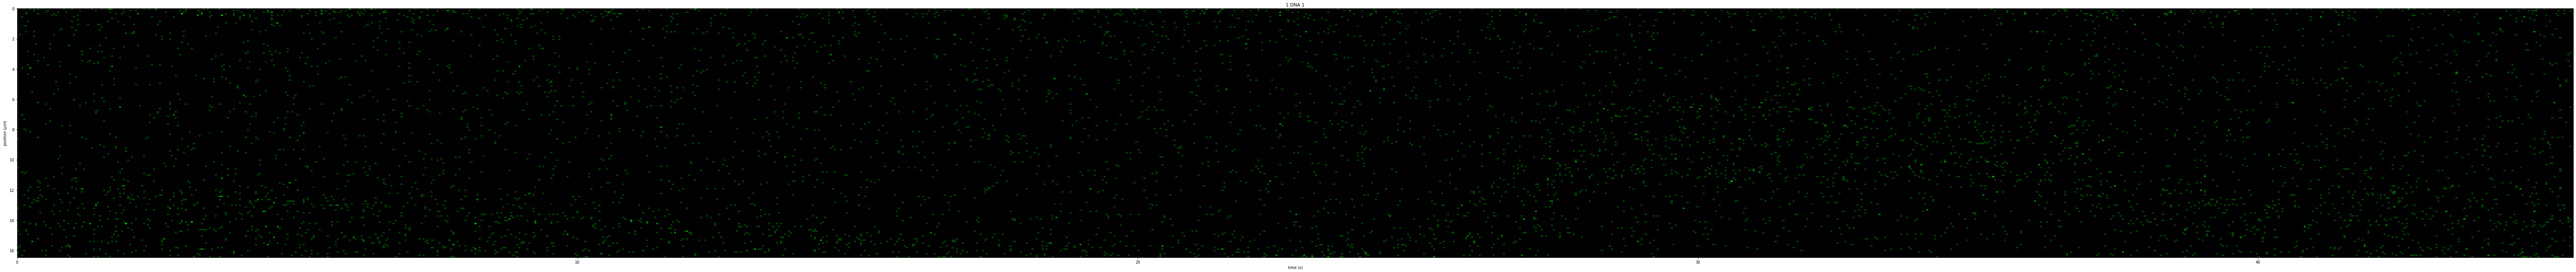

In [9]:
plt.figure(figsize=(120, 12))
kymo.plot_green(vmax=4, aspect="auto")

### Count nucleosome unwrapping events

In [15]:
import matplotlib.pyplot as plt
import lumicks.pylake as lk

%matplotlib inline
directory = r'C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\01 Data\Projects\SWR1 Project\lambda nucleosome array\700-1 Condition Data Used\2021-01-18\Before Adding SWR1 to channel 4\h5' + '/'


file = lk.File(directory + '20210118-173031 FD Curve 22 DNA 5 FD curve.h5')
fd = file.fdcurves['22 DNA 5 FD curve']


force = fd.downsampled_force2.data
time = fd.downsampled_force2.timestamps
distance = fd.d.data
plt.ion
# plt.figure(figsize=(10, 6))
# plt.rcParams['font.size'] = 18
# plt.rcParams['figure.figsize'] = (9, 6)
# plt.plot((time-time[0])/1e9, force)
# plt.ylabel('Force (pN)')
# plt.xlabel('Time (s)')
# plt.show()
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (9, 6)
plt.plot(distance, force)
plt.ylabel('Force (pN)')
plt.xlabel('Distance (um)')
plt.show()

mask = (distance<17.1) & (distance>16.55)
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (9, 6)
plt.plot(distance[mask], force[mask])
plt.ylabel('Force (pN)')
plt.xlabel('Distance (um)')
plt.show()

KeyError: '22 DNA 5 FD curve'

In [13]:
split_chrom_model = lk.inverted_odijk('DNA').subtract_independent_offset() + lk.force_offset('DNA')
split_chrom_fit = lk.FdFit(split_chrom_model)
mask = (distance<15) & (distance>12)
split_chrom_fit.add_data('first', force[mask], distance[mask])
mask = (distance<17.1) & (distance>16.55)
split_chrom_fit.add_data('second', force[mask], distance[mask],
                   params={"DNA/Lc": "DNA/Lc_2nd", "DNA/Lp": "DNA/Lp_2nd",
                           "DNA/St": "DNA/St_2nd"})
split_chrom_fit.fit()

Name,Value,Unit,Fitted,Lower bound,Upper bound
DNA/d_offset,0.0999728,[au],True,-0.1,0.1
DNA/Lp,8.55489,[nm],True,0,100
DNA/Lc,16.0083,[micron],True,0,inf
DNA/St,171960,[pN],True,0,inf
kT,4.11,[pN*nm],False,0,8
DNA/f_offset,0.0999999,[pN],True,-0.1,0.1
DNA/Lp_2nd,100,[nm],True,0,100
DNA/Lc_2nd,15.8959,[micron],True,0,inf
DNA/St_2nd,985.289,[pN],True,0,inf


The difference between contour lengths is: -112.46 nm


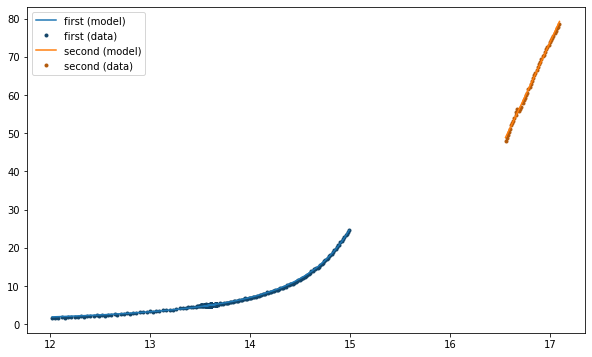

In [4]:
difference = split_chrom_fit.params['DNA/Lc_2nd'].value - split_chrom_fit.params['DNA/Lc'].value
print('The difference between contour lengths is: {:.2f} nm'.format(difference*1e3))
import numpy as np
%matplotlib inline
plt.figure(figsize=(10, 6))
split_chrom_fit.plot()

### Scans save

In [14]:
raw_data_directory = r'C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\01 Data_Analysis\Projects\SWR1 Project\lambda nucleosome array\2021-01-18\Before Adding SWR1 to channel 4\h5' + '/'
file_name = '20210118-173031 Scan 65 DNA 6 catching arrays'
file = lk.File(raw_data_directory + file_name + '.h5')
scan_keys = list(file.scans)
scan1 = file.scans[scan_keys[0]]
scan1.num_frames
scan1.export_video_red("DNA 6.gif")


OSError: Unable to open file (unable to open file: name = 'C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\01 Data_Analysis\Projects\SWR1 Project\lambda nucleosome array\2021-01-18\Before Adding SWR1 to channel 4\h5/20210118-173031 Scan 65 DNA 6 catching arrays.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:

print('scan start and stop:', scan1.start, scan1.stop)
# scan1.export_video_red("test.gif")

force = file.downsampled_force2.data
t = list(file.downsampled_force2.timestamps)
print(t[0],t[-1])
mask = (t<=scan1.stop) &(t>=scan1.start) 
t 
# time = (tt-tt[0])/1e9
# plt.plot(time, force)
np.where(scan1.start==t)[0]